# OpenCV Face detection with Haar cascades

While we can obtain significantly higher accuracy and more robust face detections with deep learning face detectors, OpenCV’s Haar cascades still have their place:

* They are lightweight
* They are super fast, even on resource-constrained devices
* The Haar cascade model size is tiny (930 KB)

Yes, there are several problems with Haar cascades, namely that they are prone to false-positive detections and less accurate than their HOG + Linear SVM, SSD, YOLO, etc., counterparts. However, they are still useful and practical, especially on resource-constrained devices.

### Import Packages

In [25]:
# import the necessary packages
from imutils.video import VideoStream
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing face detection with OpenCV and Haar Cascades

In [3]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, required=True,
#	help="path to input image")
#ap.add_argument("-c", "--cascade", type=str,
#	default="haarcascade_frontalface_default.xml",
#	help="path to haar cascade face detector")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "data/adrian_01.png",
    "cascade": "pyimagesearch/cascades/haarcascade_frontalface_default.xml"
}

In [4]:
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# load the input image from disk, resize it, and convert it to
# grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] loading face detector...


Let’s take a look at what each of these arguments means:

1. scaleFactor: **How much the image size is reduced at each image scale**. This value is used to create the scale pyramid. To detect faces at multiple scales in the image (some faces may be closer to the foreground, and thus be larger, other faces may be smaller and in the background, thus the usage of varying scales). A value of 1.05 indicates that we are reducing the size of the image by 5% at each level in the pyramid.
2. minNeighbors: **How many neighbors each window should have for the area in the window to be considered a face**. The cascade classifier will detect multiple windows around a face. This parameter controls how many rectangles (neighbors) need to be detected for the window to be labeled a face.
3. minSize: **A tuple of width and height (in pixels) indicating the window’s minimum size**. Bounding boxes smaller than this size are ignored. It is a good idea to start with (30, 30) and fine-tune from there.

Through experimentation, I found that I could still detect my face while removing the false-positive by updating the minNeighbors from 5 to 7:

rects = detector.detectMultiScale(gray, scaleFactor=1.05,
	minNeighbors=7, minSize=(30, 30),
	flags=cv2.CASCADE_SCALE_IMAGE)

This update worked because the minNeighbors parameter is designed to help control false-positive detections.

[INFO] performing face detection...
[INFO] 1 faces detected...


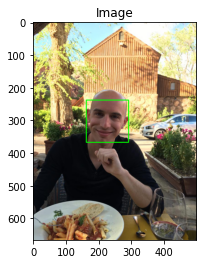

In [5]:
# detect faces in the input image using the haar cascade face
# detector
print("[INFO] performing face detection...")
rects = detector.detectMultiScale(gray, scaleFactor=1.05,
	minNeighbors=5, minSize=(30, 30),
	flags=cv2.CASCADE_SCALE_IMAGE)
print("[INFO] {} faces detected...".format(len(rects)))

# loop over the bounding boxes
for (x, y, w, h) in rects:
	# draw the face bounding box on the image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)

### Implementing real-time face detection with Haar cascade

In [7]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-c", "--cascade", type=str,
#	default="haarcascade_frontalface_default.xml",
#	help="path to haar cascade face detector")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "input": "data/opencv_face_detection.mp4",
    "output": "output/opencv_face_detection..avi",
    "cascade": "pyimagesearch/cascades/haarcascade_frontalface_default.xml"
}

In [8]:
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# grab a reference to the video file and initialize pointer to output
# video file
print("[INFO] opening video file...")
vs = cv2.VideoCapture(args["input"])
writer = None

[INFO] loading face detector...
[INFO] opening video file...


In [ ]:
'''
# load the haar cascade face detector from
print("[INFO] loading face detector...")
detector = cv2.CascadeClassifier(args["cascade"])

# initialize the video stream and allow the camera sensor to warm up
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
time.sleep(2.0)

# loop over the frames from the video stream
while True:
	# grab the frame from the video stream, resize it, and convert it
	# to grayscale
	frame = vs.read()
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	
    # perform face detection
	rects = detector.detectMultiScale(gray, scaleFactor=1.05,
		minNeighbors=5, minSize=(30, 30),
		flags=cv2.CASCADE_SCALE_IMAGE)

	# loop over the bounding boxes
	for (x, y, w, h) in rects:
		# draw the face bounding box on the image
		cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
	
    # show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
	
    # if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()
'''

In [9]:
# loop over the frames from the video stream
while True:
	# grab the next frame
	frame = vs.read()[1]

	# if we did not grab a frame then we have reached the end of the
	# video
	if frame is None:
		break
    
    # resize the frame and convert it to grayscale
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	# perform face detection
	rects = detector.detectMultiScale(gray, scaleFactor=1.05,
		minNeighbors=5, minSize=(30, 30),
		flags=cv2.CASCADE_SCALE_IMAGE)
 

	# loop over the bounding boxes
	for (x, y, w, h) in rects:
		# draw the face bounding box on the image
		cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
	if writer is None and args["output"] is not None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 20,
			(frame.shape[1], frame.shape[0]), True)
  
	# if the writer is not None, write the frame to disk
	if writer is not None:
		writer.write(frame)

# do a bit of cleanup
vs.release()

# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()

In [ ]:
#!ffmpeg -i output/opencv_face_detection.avi output/opencv_face_detection.mp4

# Face detection with OpenCV and deep learning
You can perform fast, accurate face detection with OpenCV using a pre-trained deep learning face detector model shipped with the library.

## Where do these “better” face detectors live in OpenCV and where did they come from?

Back in August 2017, OpenCV 3.3 was officially released, bringing it with it a highly improved “deep neural networks” (dnn ) module.

This module supports a number of deep learning frameworks, including Caffe, TensorFlow, and Torch/PyTorch.

The primary contributor to the dnn module, Aleksandr Rybnikov, has put a huge amount of work into making this module possible (and we owe him a big round of thanks and applause).

When using OpenCV’s deep neural network module with Caffe models, you’ll need two sets of files:

* The .prototxt file(s) which define the model architecture (i.e., the layers themselves)
* The .caffemodel file which contains the weights for the actual layers

## How does the OpenCV deep learning face detector work?

OpenCV’s deep learning face detector is based on the Single Shot Detector (SSD) framework with a ResNet base network (unlike other OpenCV SSDs that you may have seen which typically use MobileNet as the base network).

### Face detection in images with OpenCV and deep learning

In [13]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#ap.add_argument("-p", "--prototxt", required=True,
#	help="path to Caffe 'deploy' prototxt file")
#ap.add_argument("-m", "--model", required=True,
#	help="path to Caffe pre-trained model")
#ap.add_argument("-c", "--confidence", type=float, default=0.5,
#	help="minimum probability to filter weak detections")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "data/rooster.jpg",
	"prototxt": "pyimagesearch/deploy.prototxt.txt",
	"model": "pyimagesearch/res10_300x300_ssd_iter_140000.caffemodel",
	"confidence": 0.9
}

In [14]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))

[INFO] loading model...


In [15]:
# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


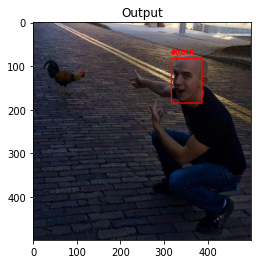

In [16]:
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > args["confidence"]:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

# show the output image
plt_imshow("Output", image)

### Face detection in video with OpenCV and deep learning

In [17]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-p", "--prototxt", required=True,
#	help="path to Caffe 'deploy' prototxt file")
#ap.add_argument("-m", "--model", required=True,
#	help="path to Caffe pre-trained model")
#ap.add_argument("-c", "--confidence", type=float, default=0.5,
#	help="minimum probability to filter weak detections")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"input" : "data/opencv_face_detection.mp4",
	"output" : "output/opencv_face_detection02.avi",
	"prototxt" : "pyimagesearch/deploy.prototxt.txt",
	"model" : "pyimagesearch/res10_300x300_ssd_iter_140000.caffemodel",
	"confidence" : 0.5
}

In [18]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])

# grab a reference to the video file and initialize pointer to output
# video file
print("[INFO] opening video file...")
vs = cv2.VideoCapture(args["input"])
writer = None

[INFO] loading model...
[INFO] opening video file...


We initialize a VideoStream object specifying camera with index zero as the source (in general this would be your laptop’s built in camera or your desktop’s first camera detected).

A few quick notes here:

* Raspberry Pi + picamera users can replace Line 25 with vs = VideoStream(usePiCamera=True).start() if you wish to use the Raspberry Pi camera module.
* If you to parse a video file (rather than a video stream) swap out the VideoStream class for FileVideoStream . You can learn more about the FileVideoStream class in this blog post.
We then allow the camera sensor to warm up for 2 seconds

In [ ]:
'''
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(args["prototxt"], args["model"])

# initialize the video stream and allow the camera sensor to warm up
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
time.sleep(2.0)

# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)
 
	# grab the frame dimensions and convert it to a blob
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
		(300, 300), (104.0, 177.0, 123.0))
 
	# pass the blob through the network and obtain the detections and
	# predictions
	net.setInput(blob)
	detections = net.forward()
	
    # loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with the
		# prediction
		confidence = detections[0, 0, i, 2]
		
        # filter out weak detections by ensuring the `confidence` is
		# greater than the minimum confidence
		if confidence < args["confidence"]:
			continue
		
        # compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(frame, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(frame, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    # show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF
 
	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()
'''

In [19]:
# loop over the frames from the video stream
while True:
	# grab the next frame
	frame = vs.read()[1]

	# if we did not grab a frame then we have reached the end of the
	# video
	if frame is None:
		break

	# resize the frame to have a maximum width of 400 pixels
	frame = imutils.resize(frame, width=400)

	# grab the frame dimensions and convert it to a blob
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
		(300, 300), (104.0, 177.0, 123.0))
 
	# pass the blob through the network and obtain the detections and
	# predictions
	net.setInput(blob)
	detections = net.forward()

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with the
		# prediction
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the `confidence` is
		# greater than the minimum confidence
		if confidence < args["confidence"]:
			continue

		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(frame, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(frame, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 
	# if the video writer is None *AND* we are supposed to write
	# the output video to disk initialize the writer
	if writer is None and args["output"] is not None:
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 20,
			(frame.shape[1], frame.shape[0]), True)
  
	# if the writer is not None, write the frame with recognized
	# faces to disk
	if writer is not None:
		writer.write(frame)

# do a bit of cleanup
vs.release()

# check to see if the video writer point needs to be released
if writer is not None:
	writer.release()

# Face detection with dlib (HOG and CNN)

The dlib library is arguably one of the most utilized packages for face recognition. A Python package appropriately named face_recognition wraps dlib’s face recognition functions into a simple, easy to use API.

However, I’m often surprised to hear that readers do not know that dlib includes two face detection methods built into the library:

1. A HOG + Linear SVM face detector that is accurate and computationally efficient.
2. A Max-Margin (MMOD) CNN face detector that is both highly accurate and very robust, capable of detecting faces from varying viewing angles, lighting conditions, and occlusion.

## Dlib’s face detection methods
The dlib library provides two functions that can be used for face detection:

1. HOG + Linear SVM: dlib.get_frontal_face_detector()
2. MMOD CNN: dlib.cnn_face_detection_model_v1(modelPath)

The get_frontal_face_detector function does not accept any parameters. A call to it returns the pre-trained HOG + Linear SVM face detector included in the dlib library.

Dlib’s HOG + Linear SVM face detector is fast and efficient. By nature of how the Histogram of Oriented Gradients (HOG) descriptor works, it is not invariant to changes in rotation and viewing angle.

For more robust face detection, you can use the MMOD CNN face detector, available via the cnn_face_detection_model_v1 function. This method accepts a single parameter, modelPath, which is the path to the pre-trained mmod_human_face_detector.dat file residing on disk.

Note: I’ve included the mmod_human_face_detector.dat file in the “Downloads” section of this guide, so you don’t have to go hunting for it.

In the remainder of this tutorial, you will learn how to use both of these dlib face detection methods.


### Creating our bounding box converting and clipping function

OpenCV and dlib represent bounding boxes differently:

* In OpenCV, we think of bounding boxes in terms of a 4-tuple of starting x-coordinate, starting y-coordinate, width, and height
* Dlib represents bounding boxes via rectangle object with left, top, right, and bottom properties

Furthermore, bounding boxes returned by dlib may fall outside the bounds of the input image dimensions (negative values or values outside the width and height of the image).

To make applying face detection with dlib easier, let’s create a helper function to (1) convert the bounding box coordinates to standard OpenCV ordering and (2) trim any bounding box coordinates that fall outside the image’s range.

In [20]:
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()

	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])

	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY

	# return our bounding box coordinates
	return (startX, startY, w, h)

### Implementing HOG + Linear SVM face detection with dlib

In [21]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, required=True,
#	help="path to input image")
#ap.add_argument("-u", "--upsample", type=int, default=1,
#	help="# of times to upsample")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "data/family.jpg",
    "upsample": 1
}

In [26]:
# load dlib's HOG + Linear SVM face detector
print("[INFO] loading HOG + Linear SVM face detector...")
detector = dlib.get_frontal_face_detector()

# load the input image from disk, resize it, and convert it from
# BGR to RGB channel ordering (which is what dlib expects)
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# perform face detection using dlib's face detector
start = time.time()
print("[INFO[ performing face detection with dlib...")
rects = detector(rgb, args["upsample"])
end = time.time()
print("[INFO] face detection took {:.4f} seconds".format(end - start))

[INFO] loading HOG + Linear SVM face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 0.4541 seconds


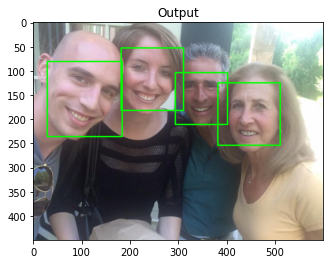

In [27]:
# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r) for r in rects]

# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt_imshow("Output", image)

### Implementing CNN face detection with dlib

In [28]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, required=True,
#	help="path to input image")
#ap.add_argument("-m", "--model", type=str,
#	default="mmod_human_face_detector.dat",
#	help="path to dlib's CNN face detector model")
#ap.add_argument("-u", "--upsample", type=int, default=1,
#	help="# of times to upsample")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "data/avengers.jpg",
    "model": "pyimagesearch/mmod_human_face_detector.dat",
    "upsample": 1
}

In [29]:
# load dlib's CNN face detector
print("[INFO] loading CNN face detector...")
detector = dlib.cnn_face_detection_model_v1(args["model"])

# load the input image from disk, resize it, and convert it from
# BGR to RGB channel ordering (which is what dlib expects)
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# perform face detection using dlib's face detector
start = time.time()
print("[INFO[ performing face detection with dlib...")
results = detector(rgb, args["upsample"])
end = time.time()
print("[INFO] face detection took {:.4f} seconds".format(end - start))

[INFO] loading CNN face detector...
[INFO[ performing face detection with dlib...
[INFO] face detection took 8.0515 seconds


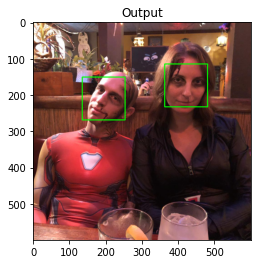

In [30]:
# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image, r.rect) for r in results]

# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt_imshow("Output", image)

# Face detection tips, suggestions, and best practices

## Pros and cons of OpenCV’s Haar cascade face detector

Pros:

* Very fast, capable of running in super real-time
* Low computational requirements — can easily be run on embedded, resource-constrained devices such as the Raspberry Pi (RPi), NVIDIA Jetson Nano, and Google Coral
* Small model size (just over 400KB; for reference, most deep neural networks will be anywhere between 20-200MB).

Cons:

* Highly prone to false-positive detections
* Typically requires manual tuning to the detectMultiScale function
* Not anywhere near as accurate as its HOG + Linear SVM and deep learning-based face detection counterparts

My recommendation: Use Haar cascades when speed is your primary concern, and you’re willing to sacrifice some accuracy to obtain real-time performance.

If you’re working on an embedded device like the RPi, Jetson Nano, or Google Coral, consider:

* Using the Movidius Neural Compute Stick (NCS) on the RPi — that will allow you to run deep learning-based face detectors in real-time
* Reading the documentation associated with your device — the Nano and Coral have specialized inference engines that can run deep neural networks in real-time

## Pros and cons of OpenCV’s deep learning face detector

OpenCV’s deep learning face detector is based on a Single Shot Detector (SSD) with a small ResNet backbone, allowing it to be both accurate and fast.

Pros:

* Accurate face detector
* Utilizes modern deep learning algorithms
* No parameter tuning required
* Can run in real-time on modern laptops and desktops
* Model is reasonably sized (just over 10MB)
* Relies on OpenCV’s cv2.dnn module
* Can be made faster on embedded devices by using OpenVINO and the Movidius NCS

Cons:

* More accurate than Haar cascades and HOG + Linear SVM, but not as accurate as dlib’s CNN MMOD face detector
* May have unconscious biases in the training set — may not detect darker-skinned people as accurately as lighter-skinned people

My recommendation: OpenCV’s deep learning face detector is your best “all-around” detector. It’s very simple to use, doesn’t require additional libraries, and relies on OpenCV’s cv2.dnn module, which is baked into the OpenCV library.

Furthermore, if you are using an embedded device, such as the Raspberry Pi, you can plug in a Movidius NCS and utilize OpenVINO to easily obtain real-time performance.

Perhaps the biggest downside of this model is that I’ve found that the face detections on darker-skinned people aren’t as accurate as lighter-skinned people. That’s not necessarily a problem with the model itself but rather the data it was trained on — to remedy that problem, I suggest training/fine-tune the face detector on a more diverse set of ethnicities.

## Pros and cons of dlib’s HOG + Linear SVM face detector

The HOG + Linear SVM algorithm was first introduced by Dalal and Triggs in their seminal 2005 work, Histograms of Oriented Gradients for Human Detection.

Similar to Haar cascades, HOG + Linear SVM relies on image pyramids and sliding windows to detect objects/faces in an image.

The algorithm is a classic in computer vision literature and is still used today.

Pros:

* More accurate than Haar cascades
* More stable detection than Haar cascades (i.e., fewer parameters to tune)
* Expertly implemented by dlib creator and maintainer, Davis King
* Extremely well documented, both in terms of the dlib implementation and the HOG + Linear SVM framework in the computer vision literature

Cons:

* Only works on frontal views of the face — profile faces will not be detected as the HOG descriptor does not tolerate changes in rotation or viewing angle well
* Requires an additional library (dlib) be installed — not necessarily a problem per se, but if you’re using just OpenCV, then you may find adding another library into the mix cumbersome
* Not as accurate as deep learning-based face detectors
* For the accuracy, it’s actually quite computationally expensive due to image pyramid construction, sliding windows, and computing HOG features at every stop of the window

My recommendation: HOG + Linear SVM is a classic object detection algorithm that every computer vision practitioner should understand. That said, for the accuracy HOG + Linear SVM gives you, the algorithm itself is quite slow, especially when you compare it to OpenCV’s SSD face detector.

I tend to use HOG + Linear SVM in places where Haar cascades aren’t accurate enough, but I cannot commit to using OpenCV’s deep learning face detector.

## Pros and cons of dlib’s CNN face detector
Davis King, the creator of dlib, trained a CNN face detector based on his work on max-margin object detection. The method is highly accurate, thanks to the design of the algorithm itself, along with the care Davis took in curating the training set and training the model.

That said, without GPU acceleration, this model cannot realistically run in real-time.

Pros:

* Incredibly accurate face detector
* Small model size (under 1MB)
* Expertly implemented and documented

Cons:

* Requires an additional library (dlib) be installed
* Code is more verbose — end-user must take care to convert and trim bounding box coordinates if using OpenCV
* Cannot run in real-time without GPU acceleration
* Not out-of-the-box compatible for acceleration via OpenVINO, Movidius NCS, NVIDIA Jetson Nano, or Google Coral

My recommendation: I tend to use dlib’s MMOD CNN face detector when batch processing face detection offline, meaning that I can set up my script and let it run in batch mode without worrying about real-time performance.

In fact, when I build training sets for face recognition, I often use dlib’s CNN face detector to detect faces before training the face recognizer itself. When I’m ready to deploy my face recognition model, I’ll often swap out dlib’s CNN face detector for a more computationally efficient one that can run in real-time (e.g., OpenCV’s CNN face detector).

The only place I tend not to use dlib’s CNN face detector is when I’m using embedded devices. This model will not run in real-time on embedded devices, and it’s out-of-the-box compatible with embedded device accelerators like the Movidius NCS.

That said, you just cannot beat the face detection accuracy of dlib’s MMOD CNN, so if you need accurate face detections, go with this model.

## My personal suggestions for face detection
When it comes to a good, all-purpose face detector, I suggest using OpenCV’s DNN face detector:

* It achieves a nice balance of speed and accuracy
* As a deep learning-based detector, it’s more accurate than its Haar cascade and HOG + Linear SVM counterparts
* It’s fast enough to run real-time on CPUs
* It can be further accelerated using USB devices such as the Movidius NCS
* No additional libraries/packages are required — support for the face detector is baked into OpenCV via the cv2.dnn module

That said, there are times when you would want to use each of the face detectors mentioned above, so be sure to read through each of those sections carefully.